### Overview 

Columns:

RI: refractive index

NA: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

In [1]:
# Importing Libraries and Reading the Dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
sns.set_style('darkgrid')

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
dataset = pd.read_csv('glass.csv')
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
dataset.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
dataset['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

### Data Visualization and Preprocessing

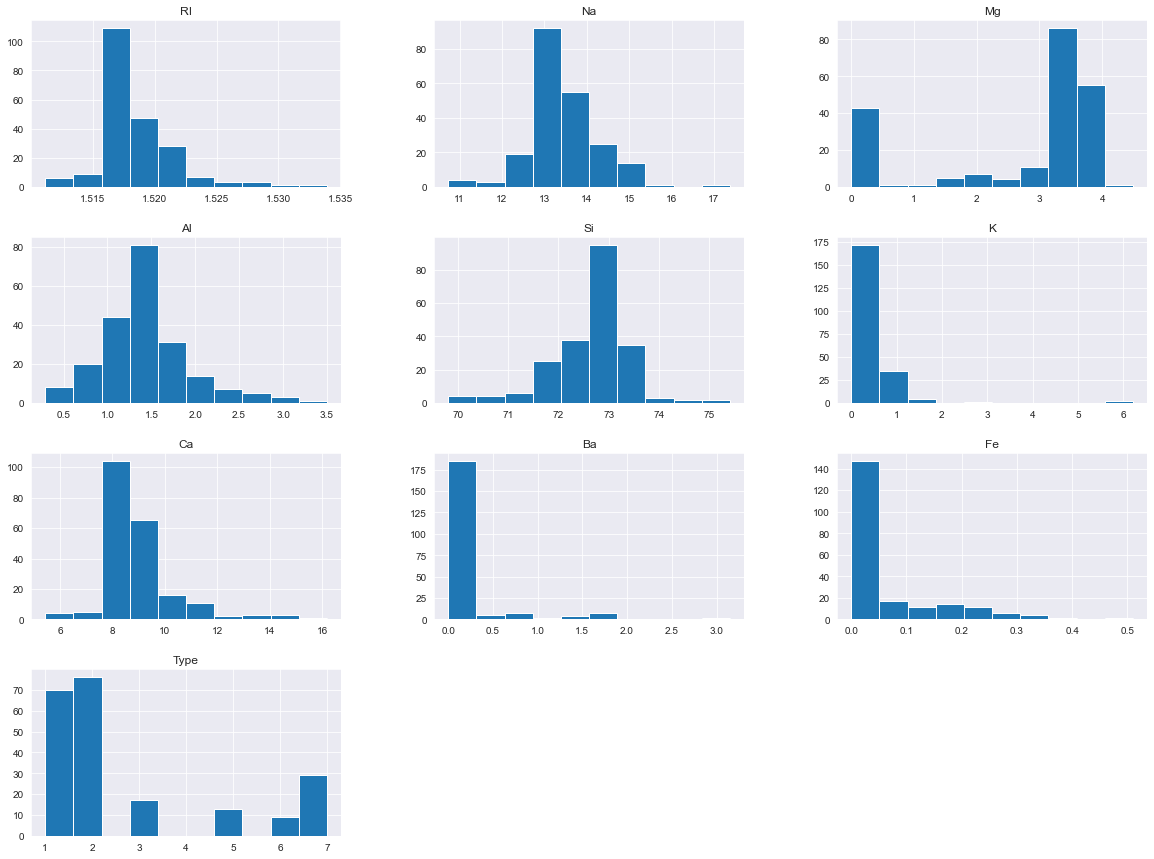

In [7]:
dataset.hist(figsize=(20,15))
plt.show()

In [8]:
attribute=dataset.columns.tolist()
attribute

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

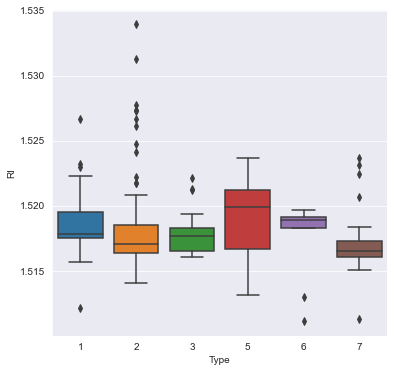

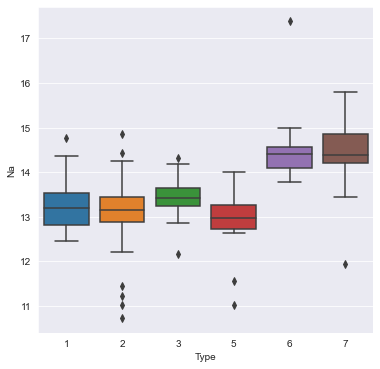

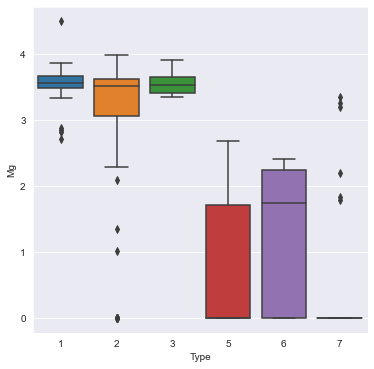

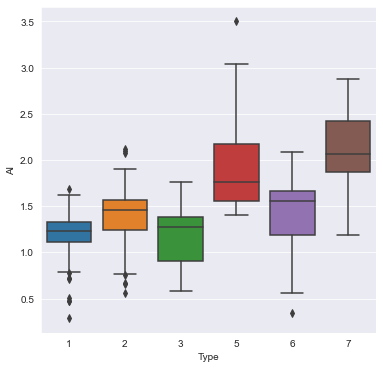

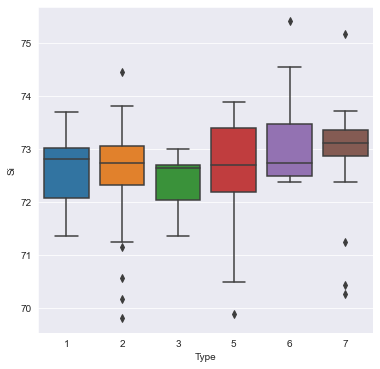

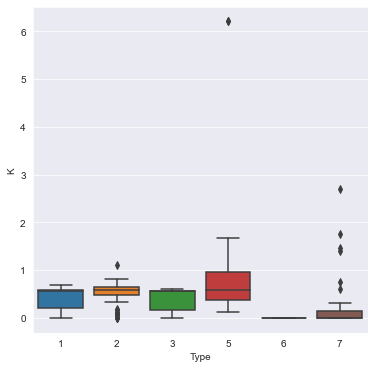

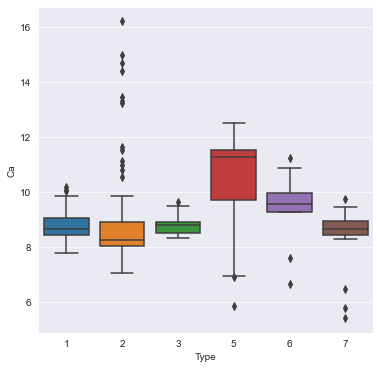

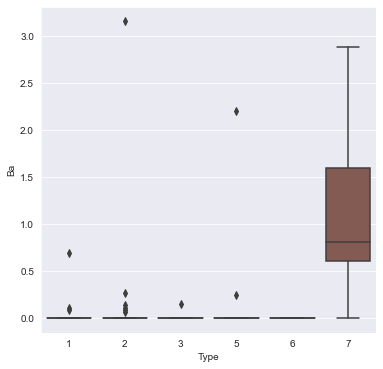

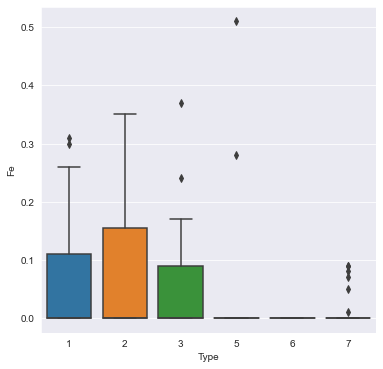

In [9]:
for i in range(len(attribute)-1):
    figure = plt.figure(figsize=(6,6))
    ax = sns.boxplot(x='Type', y=attribute[i], data=dataset)

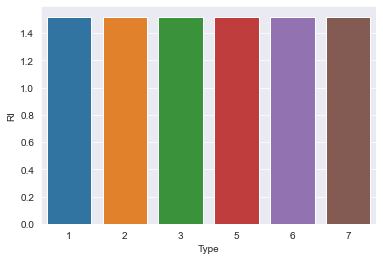

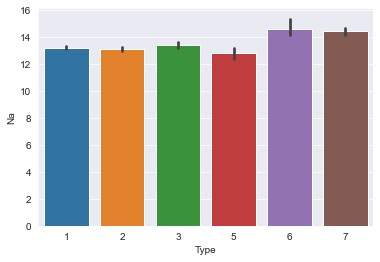

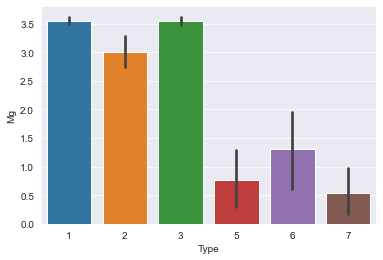

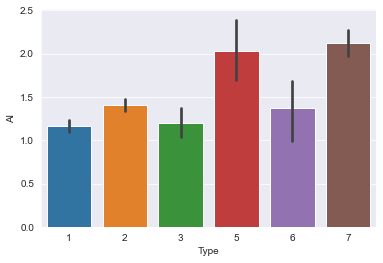

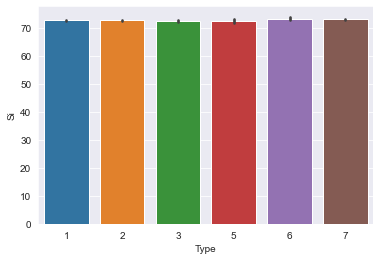

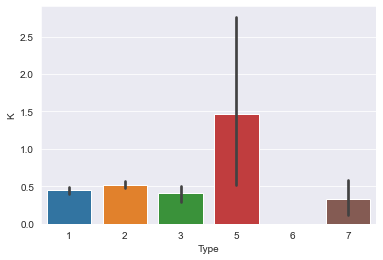

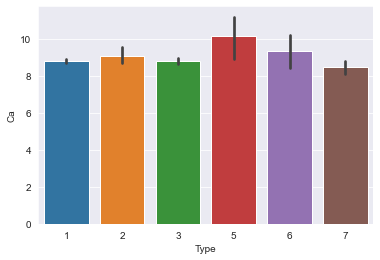

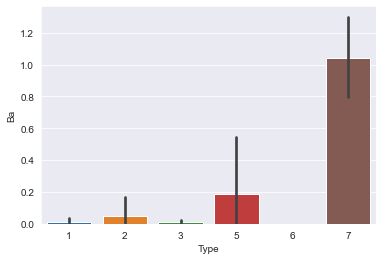

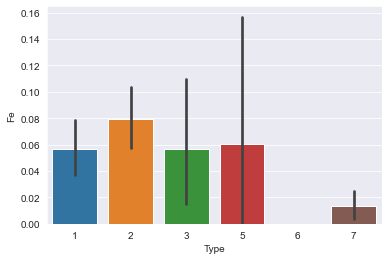

In [10]:
# Average Bar Plot for each variables 

for i in range(len(attribute)-1):
    
    figure = plt.figure()
    
    sns.barplot(x = 'Type', y = attribute[i], data=dataset)

<Figure size 648x648 with 0 Axes>

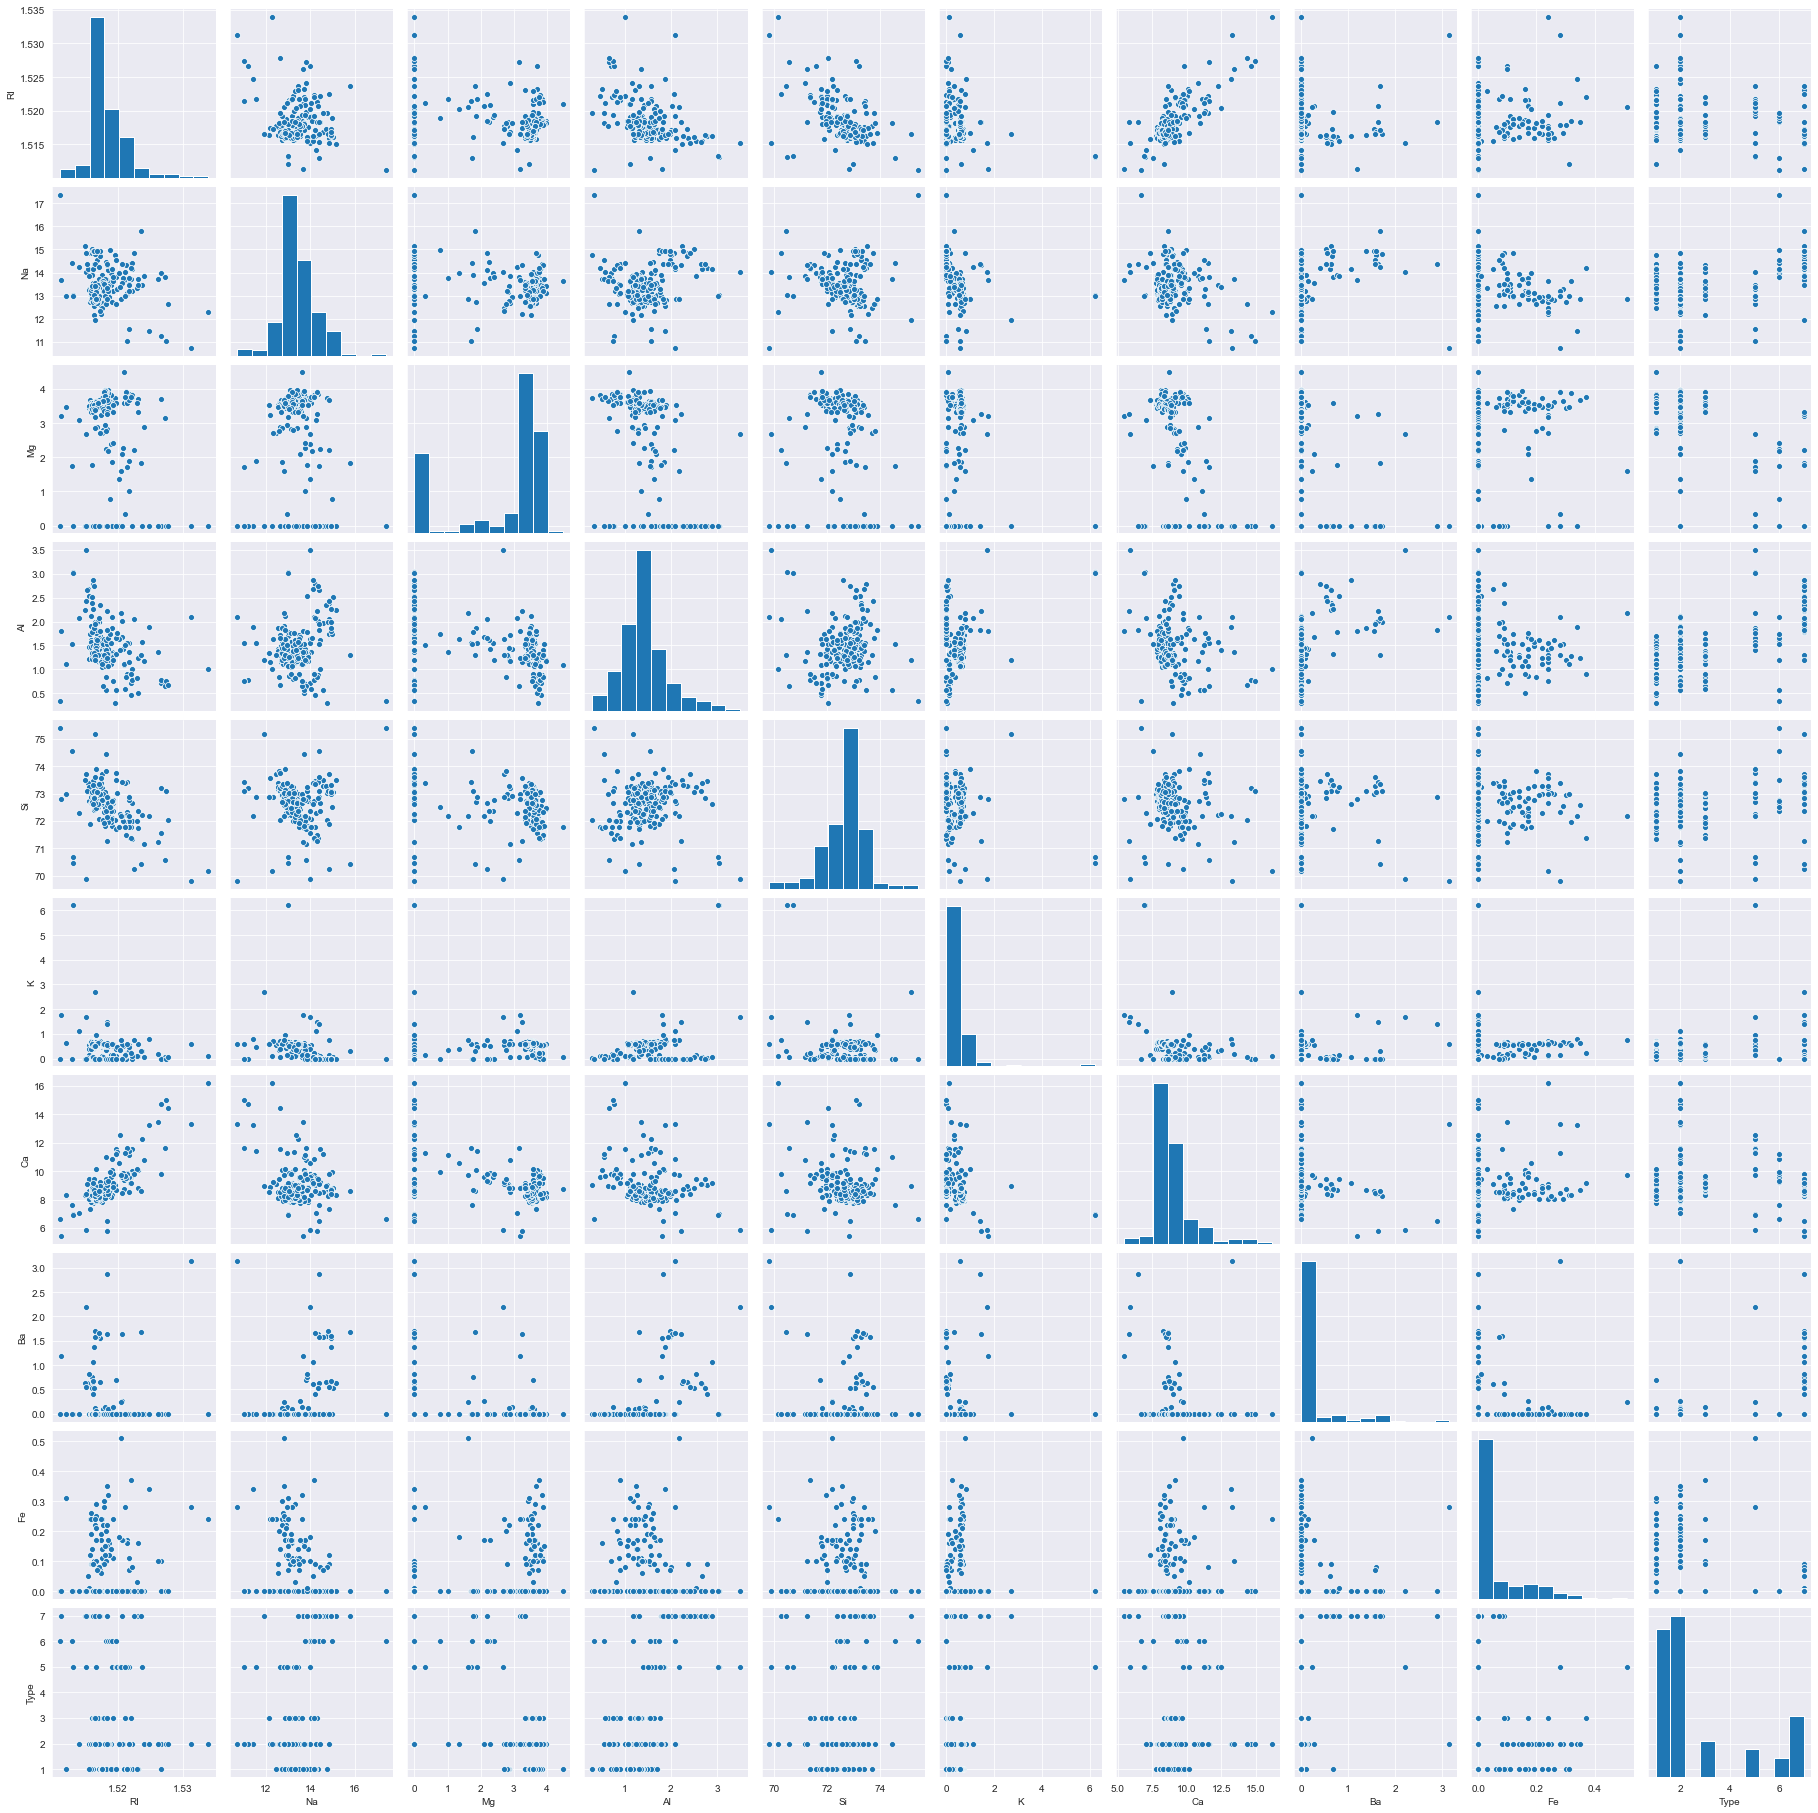

In [11]:
plt.figure(figsize=(9,9))
sns.pairplot(dataset[attribute],palette='coolwarm')
plt.show()

<AxesSubplot:>

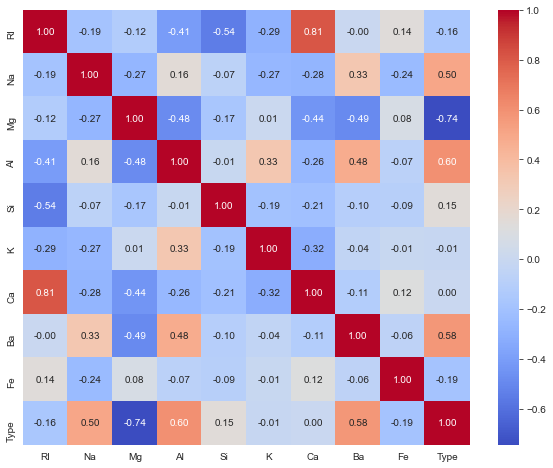

In [12]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

In [13]:
corr.sort_values(["Type"], ascending = False, inplace = True)
print(corr.Type)

Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64


In [14]:
X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


In [25]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
classifier = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svc_pipe = Pipeline(steps)

In [26]:
svc_pipe.fit(X_train, y_train)

f:\python-3.6\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('scalar', StandardScaler()), ('model', SVC())])

In [29]:
y_pred_test = svc_pipe.predict(X_test)
y_pred_train = svc_pipe.predict(X_train)
accuracy_svc_train = accuracy_score(y_train, y_pred_train)
accuracy_svc_test = accuracy_score(y_test, y_pred_test)
print("Train set: ", accuracy_svc_train)
print("Test set: ", accuracy_svc_test)

Train set:  0.79375
Test set:  0.7037037037037037


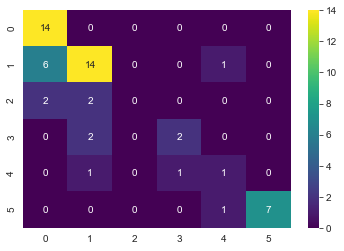

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()